In [1]:
import pandas as pd
from IPython.display import Image, HTML
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel
print("Setup Complete")

Setup Complete


In [2]:
df_r = pd.read_csv("C:\\Users\\Apprenant\\PycharmProjects\\sys_recommandation\\data\\recommandation.csv")

In [3]:
df_r

,Unnamed: 0,product_name,generic_name,brands,categories
0,0,Purée Pomme Myrtille sans sucres ajoutés,purée de pommes et de myrtilles sans sucres aj...,Biocoop,Compotes pommes myrtille
1,1,Abatilles Sainte Anne &quot;la Bordelaise&quot;,eau minérale naturelle,Abatilles,eau minérale
2,2,Kailo nouilles arôme poulet,NaN,Kailo brand,NaN
3,3,Blanc de poulet,Blanc de poulet cuit traité en salaison de qua...,U,Blancs de poulet
4,4,Bâtonnets savoureux,NaN,Ronde des mers,NaN
...,...,...,...,...,...
29729,29729,Colacao,NaN,Idilia,NaN
29730,29730,Cannelle moulue,NaN,La Vie Claire,Cannelle en poudre
29731,29731,Mousse de Canard,Mousse de canard,"Le Mousson,Paul Prédault","Viandes,Charcuteries,Mousses,Mousses de canard..."
29732,29732,Mortadelle (+ 2 tranches gratuites),NaN,Monique Ranou,Mortadelle


In [4]:
df_r['product_name'] = df_r['product_name'].astype('str')
df_r['description'] = df_r['categories'].astype('str')

In [5]:
product_name_corpus = ' '.join(df_r['product_name'])
description_corpus = ' '.join(df_r['description'])

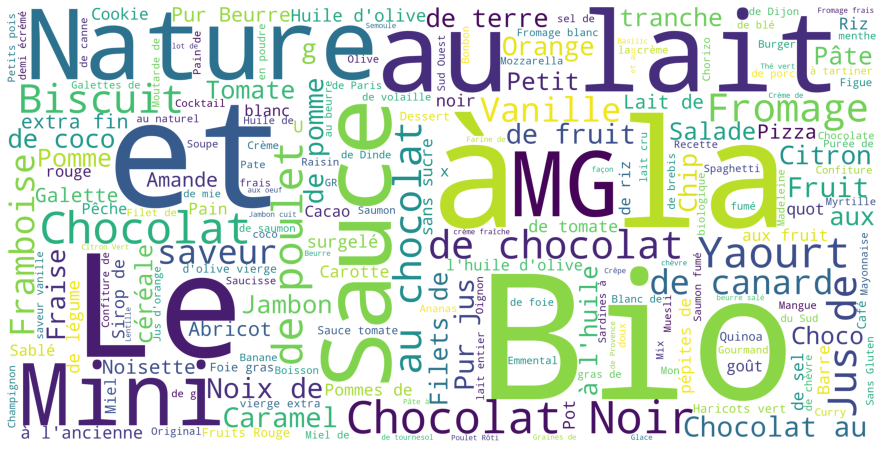

In [6]:
name_wordcloud = WordCloud(stopwords = STOPWORDS, background_color = 'white', height = 2000, width = 4000).generate(product_name_corpus)
plt.figure(figsize = (16,8))
plt.imshow(name_wordcloud)
plt.axis('off')
plt.show()

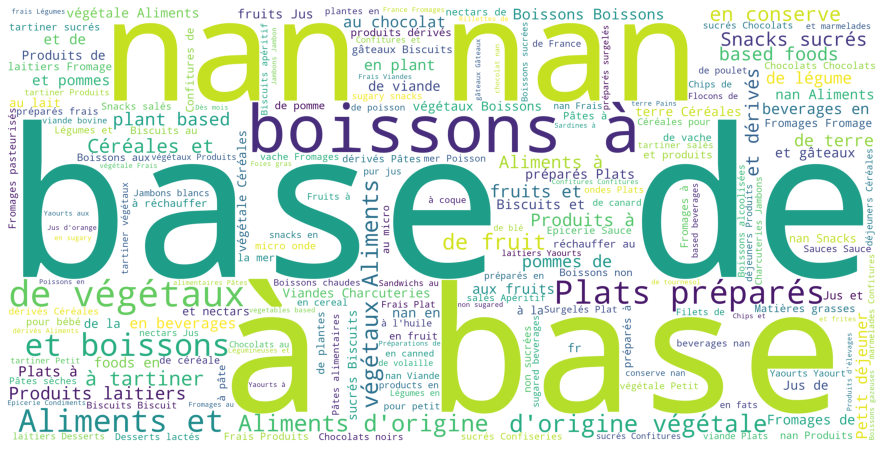

In [7]:
description_wordcloud = WordCloud(stopwords = STOPWORDS, background_color = 'white', height = 2000, width = 4000).generate(description_corpus)
plt.figure(figsize = (16,8))
plt.imshow(description_wordcloud)
plt.axis('off')
plt.show()

In [8]:
df_r['content'] = df_r[['product_name', 'description']].astype(str).apply(lambda x: ' // '.join(x), axis = 1)

In [9]:
df_r['content']

0        Purée Pomme Myrtille sans sucres ajoutés // Co...
1        Abatilles Sainte Anne &quot;la Bordelaise&quot...
2                       Kailo nouilles arôme poulet // nan
3                      Blanc de poulet // Blancs de poulet
4                               Bâtonnets savoureux // nan
                               ...                        
29729                                       Colacao // nan
29730                Cannelle moulue // Cannelle en poudre
29731    Mousse de Canard // Viandes,Charcuteries,Mouss...
29732    Mortadelle (+ 2  tranches gratuites) // Mortad...
29733                  Chips Rôtisserie // Chips et frites
Name: content, Length: 29734, dtype: object

In [10]:
# Fillna
df_r['content'].fillna('Null', inplace = True)

Train the Recommender

In [11]:
tf = TfidfVectorizer(analyzer = 'word', ngram_range = (1, 2), min_df = 0, stop_words = 'english')
tfidf_matrix = tf.fit_transform(df_r['content'])

In [12]:
tfidf_matrix

<29734x79156 sparse matrix of type '<class 'numpy.float64'>'
	with 480388 stored elements in Compressed Sparse Row format>

In [13]:
tfidf_vecteur = tf.transform(['pizza au fromage'])

Cosine Similarity

In [17]:
cosine_similarities = linear_kernel(tfidf_matrix, tfidf_vecteur)

In [18]:
# df_r.index.name='id'
df_r["id"] = df_r.index

In [19]:
results = {}
for idx, row in df_r.iterrows():
    similar_indices = cosine_similarities[idx].argsort()[:-100:-1]
    similar_items = [(cosine_similarities[idx][i], df_r['id'][i]) for i in similar_indices]
    results[row['id']] = similar_items[1:]

Let's make a prediction

In [ ]:
def item(id):
    name   = df_r.loc[df_r['id'] == id]['content'].tolist()[0].split(' // ')[0]
    desc   = ' \nDescription: ' + df_r.loc[df_r['id'] == id]['content'].tolist()[0].split(' // ')[1][0:165] + '...'
    prediction = name  + desc
    return prediction

def recommend(item_id, num):
    print('Recommending ' + str(num) + ' products similar to ' + item(item_id))
    print('---')
    recs = results[item_id][:num]
    for rec in recs:
        print('\nRecommended: ' + item(rec[1]) + '\n(score:' + str(rec[0]) + ')')

In [ ]:
recommend(item_id = 5, num = 5)